# **Exploratory data analysis**

## General info

**Project:** Heart disease prediction

**Author:** Maria (GitHub - Stork656)

**Date:** 2026

**Data source:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 

**Goal:** To explore the dataset and identify appropriate data preprocessing steps for subsequent machine learning models in heart disease prediction.

## Table of contents

1. [General Info](#General-info)
2. [Data Loading and Setup](#Data-Loading-and-Setup)
3. [Dataset Overview](#Dataset-Overview)
4. [Feature Analysis](#Feature-Analysis)
6. [Target Variable Analysis](#Target-Variable-Analysis)
7. [Summary](#Summary)

#### Data Loading and Setup

In this section, the dataset is loaded and prepared for further exploratory analysis.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from pathlib import Path

In [44]:
path = Path('../data/raw/heart-diseases.csv')
df = pd.read_csv(path) 
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122,N,0.0,Up,0.0


In [45]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110.0,264.0,0.0,Normal,132,N,1.2,Flat,1.0
914,68,M,ASY,144.0,193.0,1.0,Normal,141,N,3.4,Flat,1.0
915,57,M,ASY,130.0,131.0,0.0,Normal,115,Y,1.2,Flat,1.0
916,57,F,ATA,130.0,236.0,0.0,LVH,174,N,0.0,Flat,1.0
917,38,M,NAP,138.0,175.0,0.0,Normal,173,N,0.0,Up,0.0


#### Dataset Overview

In [46]:
df.shape

(918, 12)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    913 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [48]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      5
dtype: int64

In [49]:
(df.isna().sum() / len(df) * 100).round(2)

Age               0.00
Sex               0.00
ChestPainType     0.00
RestingBP         0.11
Cholesterol       0.11
FastingBS         0.11
RestingECG        0.00
MaxHR             0.00
ExerciseAngina    0.00
Oldpeak           0.00
ST_Slope          0.00
HeartDisease      0.54
dtype: float64

In [50]:
df.duplicated().sum()

np.int64(0)

* Датасет состоит из 918 строк и 12 столбцов.
* Признаки включают числовые, категориальные и бинарные (подробности см. в [Feature Analysis](#Feature-Analysis)
).
* Пропуски присутствуют в столбцах RestingBP, Cholesterol, FastingBS и в целевой переменной HeartDisease, однако их доля составляет менее 1% данных. Дубликаты отсутствуют.

In [51]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,917.000000,917.000000,917.000000,918.000000,918.000000,913.000000
mean,53.510893,132.355507,198.749182,0.233370,136.809368,0.887364,0.555312
std,9.432617,18.482498,109.433178,0.423206,25.460334,1.066570,0.497204
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* Возраст испытуемых варьируется от 28 до 77 лет, при этом средний возраст около 54 лет.
* Минимальные значения RestingBP и Cholesterol равны 0, что физически невозможно, поэтому их следует рассматривать как пропуски или выбросы.
* Максимальные значения этих же признаков значительно выше 75%-квантиля. Но, вероятно, это не выбросы, а тяжелые формы заболевания.
* Распределение Oldpeak имеет правосторонний перекос, но это нормально т.к. у большинства людей ST после физической нагрузки небольшой. Однако отрицательные значения могут быть выбросом.
* Целевая переменная HeartDisease содержит два класса и распределена почти поровну, что говорит о сбалансированных данных для классификации.
* Средние и медианные значения числовых признаков показывают, что большинство пациентов находятся в среднем диапазоне значений. 

#### Target Variable Analysis

              Count  Percent
HeartDisease                
1.0             507    55.53
0.0             406    44.47


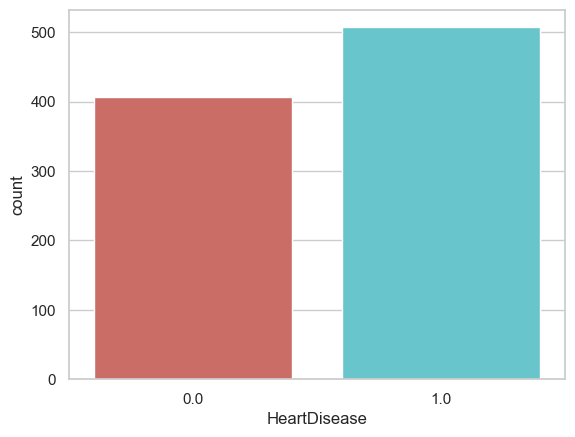

In [52]:
counts = df['HeartDisease'].value_counts()
percent = df['HeartDisease'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': counts, 'Percent': percent.round(2)}))

sns.set(style="whitegrid")
y_data = pd.DataFrame(df['HeartDisease'])
sns.countplot(
    x='HeartDisease',
    data=y_data,
    hue='HeartDisease',
    palette='hls',
    legend=False
)
plt.show()

Целевая метка содержит два класса: 0 – заболеваний нет (406 пациентов, 44.3%), 1 – есть заболевание (507 пациентов, 55.3%). Данные имеют небольшой дисбаланс, но не критичный, поэтому дополнительная балансировка классов не потребуется.

#### Feature Analysis

In [53]:
lst_cat, lst_num, lst_bin = [], [], []
target = 'HeartDisease'

for col in df.drop(columns = [target]).columns:
    if df[col].nunique() == 2:
        lst_bin.append(col)
    elif is_numeric_dtype(df[col]):
        lst_num.append(col)
    else:
        lst_cat.append(col)

print(f'Target: {target}\n')
print(f'Numerical features: {', '.join(lst_num)}\n')
print('Categorical features:')
for f in lst_cat:
    print(f'{df[f].value_counts()}\n')

print('Binary features:')
for f in lst_bin:
    print(f'{df[f].value_counts()}\n')

Target: HeartDisease

Numerical features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

Categorical features:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Binary features:
Sex
M    725
F    193
Name: count, dtype: int64

FastingBS
0.0    703
1.0    214
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64




Набор содержит в себе числовые данные (Age, RestingBP, Cholesterol, MaxHR, Oldpeak)

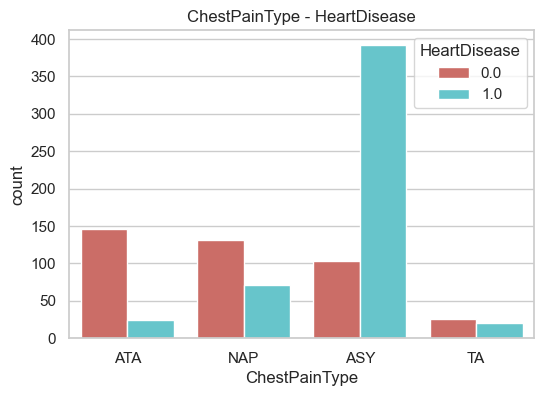

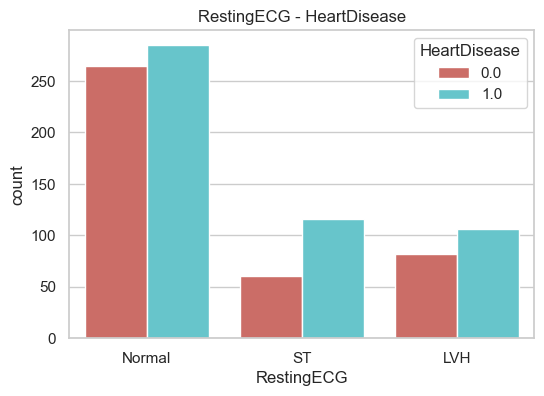

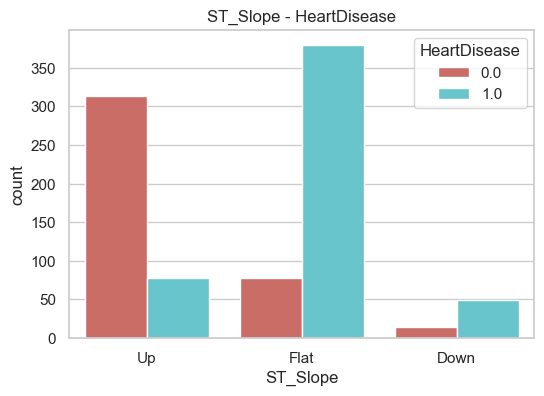

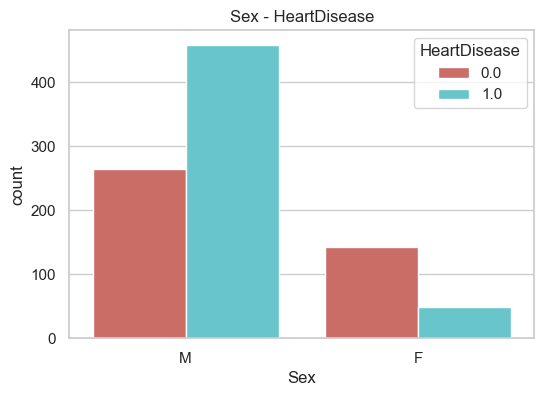

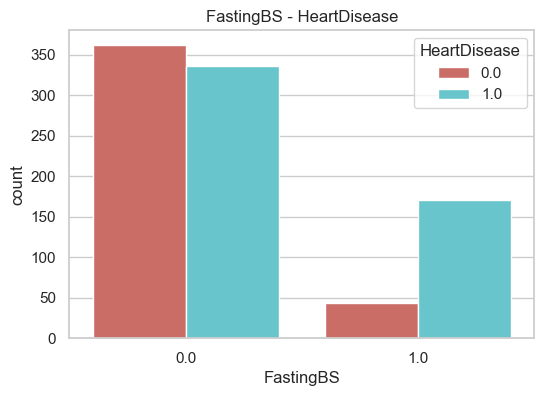

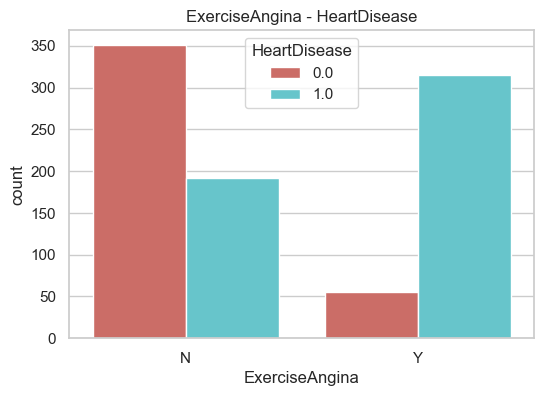

In [54]:
for col in lst_cat + lst_bin:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='HeartDisease', data=df, palette='hls')
    plt.title(f'{col} - HeartDisease')
    plt.show()

**ChestPainType**

В наборе больше остальных людей с бессимптомной болью, меньше всего с типичной стенокардией.
* Бессимптомная боль (ASY) имеет сильную корреляцию. 
* Атипичная стенокардия (ATA) и не связанные с сердцем боли (NAP) имеют обратную корреляцию.
* Типичная стенокардия (TA) слабокоррелирует.

**RestingECG**

Большинство людей с нормальными показаниями.
* Более выраженная корреляция при аномалии зубца (ST) или гипертрофии левого желудочка (LVH).
* Слабая корреляция при нормальных результатах электрокардиограммы в состоянии покоя.

**ST_Slope**

Меньше остальных в наборе людей с понижением электрокардиограммы.
* Обратная сильная корреляция при подъёме  на электрокардиограмме при максимальной нагрузке.
* Сильная кореляция при плоской электрокардиограмме.
* Прямая корреляция при понижении электрокардиограммы.

**Sex**

В исследовании гораздо больше мужчин приняло участие.
* Прямая корреляция у мужчин.
* Обратная корреляция у женщин.

**Fasting BS**

Большинство испытуемых имеют нормальный сахар.
* Слабая корреляция при нормально показателе.
* Сильная корреляция при уровене сахара в крови > 120 мг.

**ExerciseAngina**

Большинство испытуемых не страдают стенокардией в нагрузке
* Обратная корреляция при отсутствии стенокардии в нагрузке
* Сильная прямая корреляция при наличии стенокардии в нагрузке

<Axes: >

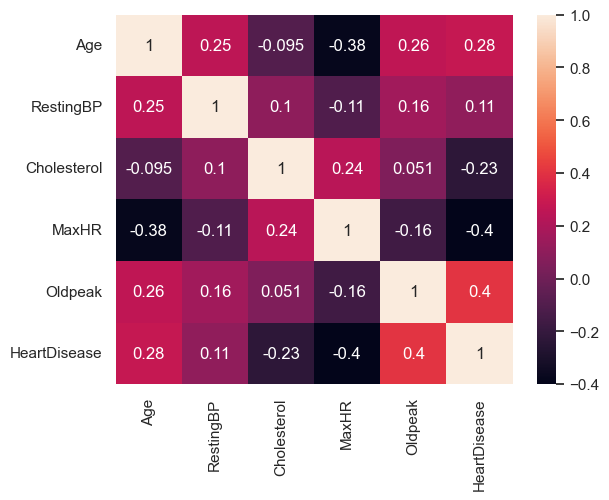

In [55]:
plt.figure()
sns.heatmap(df[lst_num + [target]].corr(), annot=True)

Есть признаки (например RestingBP) который имеют слабую корреляцию Пирсона, но являются известными факторами риска заболеваний сердцы. Стоит посмотреть распределение для каждого признака отдельно.

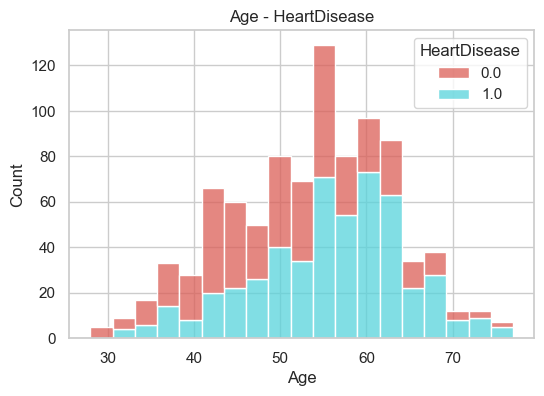

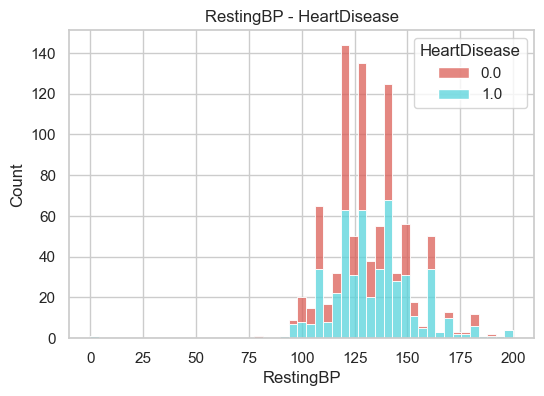

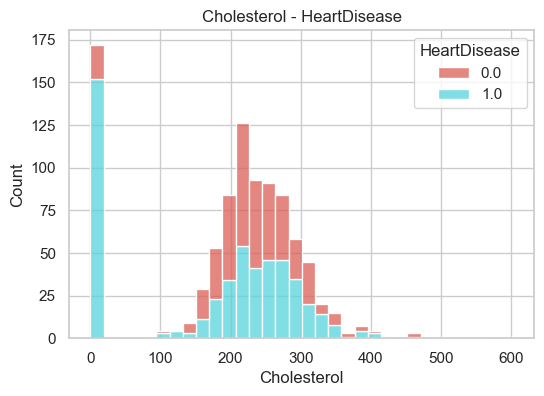

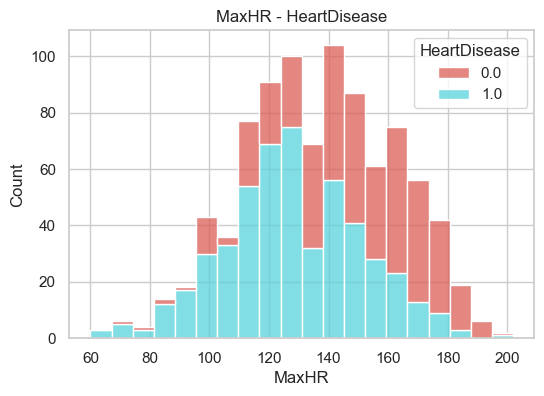

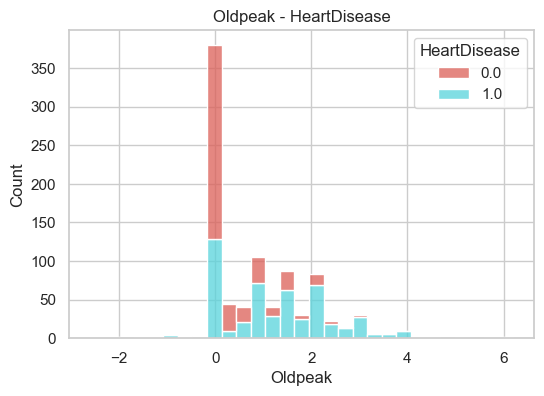

In [56]:
for col in lst_num:
    plt.figure(figsize=(6,4))
    sns.histplot(df, x=col, hue='HeartDisease', multiple='stack', palette='hls')
    plt.title(f'{col} - HeartDisease')
    plt.show()

**Age**
* Есть прямая корреляция. С возрастом риск заболевания увеличивается.

**RestingBP**
* Чем выше давление, тем больше риск возникновения заболевания (>140). Однако, при очень низких показателях риск также увеличивается (<100). Связь не линейная.

**Cholesterol**
* С увеличением холестерина риск растет (>300). Но при низких значениях тоже есть больные (<150). Связь не линейная.

**MaxHR**
* Чем ниже максимальная достигнутая частота сердечных сокращений тем выше риск заболевания. Наблюдается обратная корреляция.

**Oldpeak**
* Чем сильнее выше ST, тем больше риск. Прямая корреляция


Все признаки являются нужными, нет необходимости удалять.

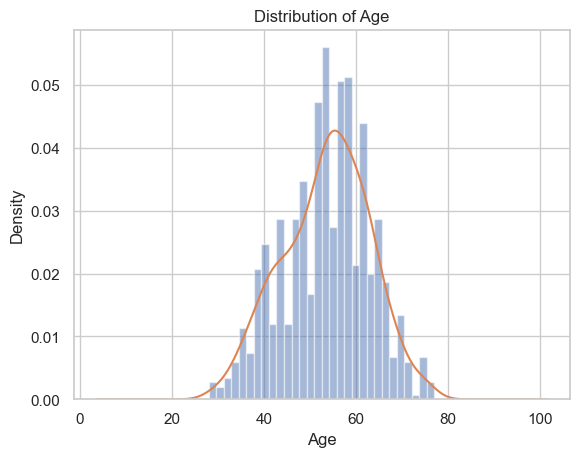

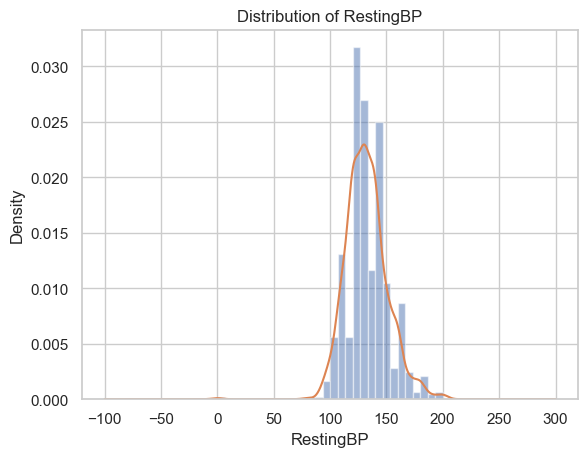

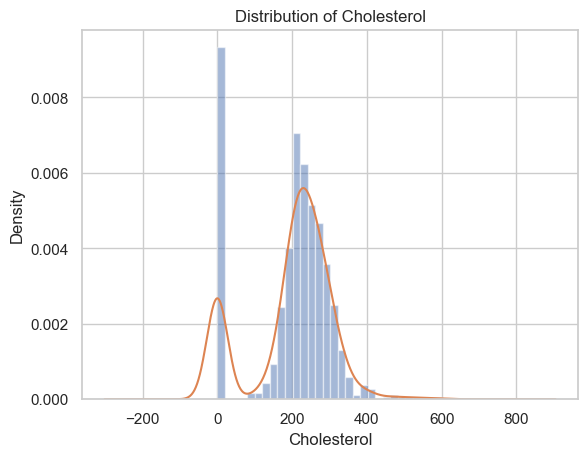

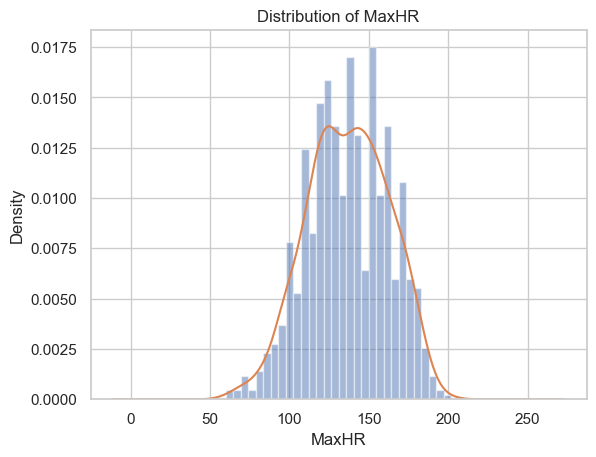

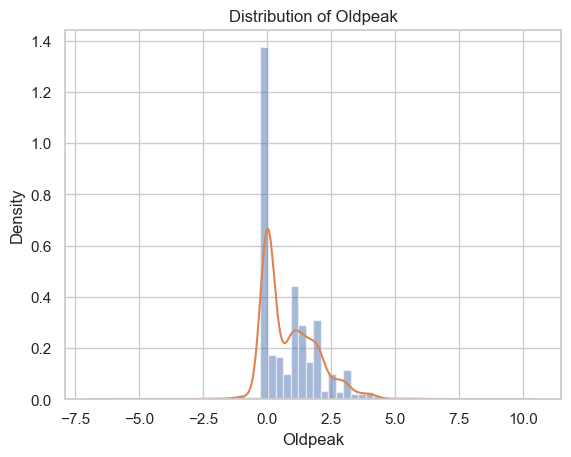

In [57]:
for col in lst_num:
    plt.figure()
    df[col].plot(kind='hist', density=True, bins=30, alpha=0.5)
    df[col].plot(kind='kde')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

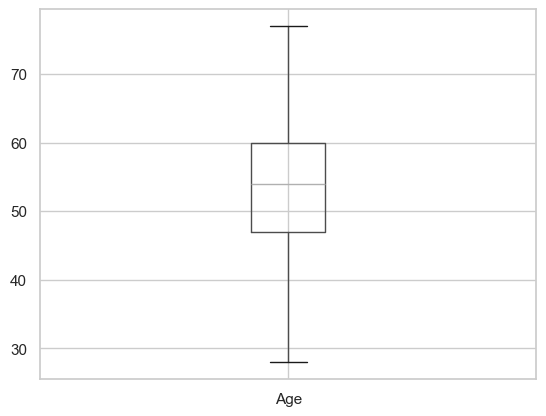

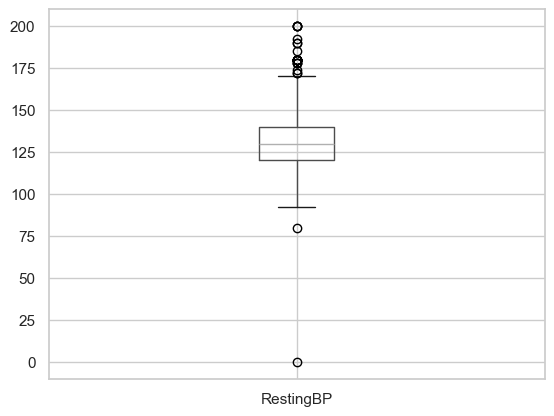

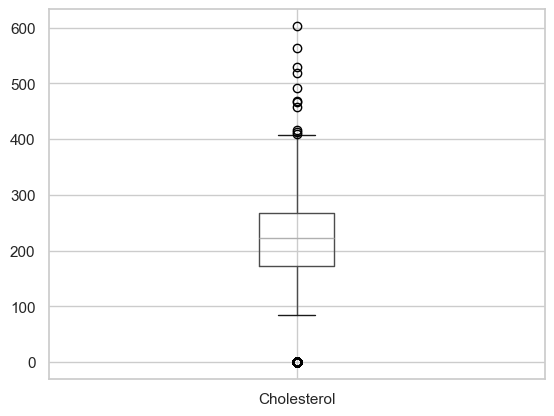

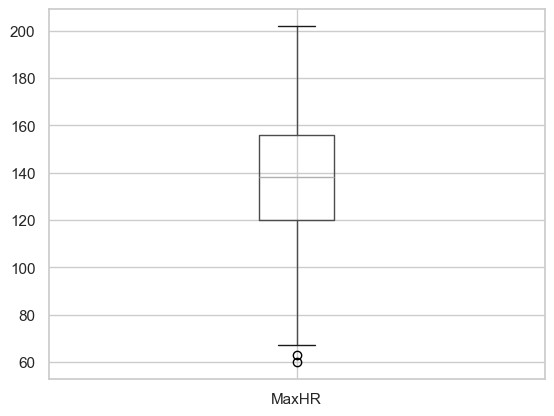

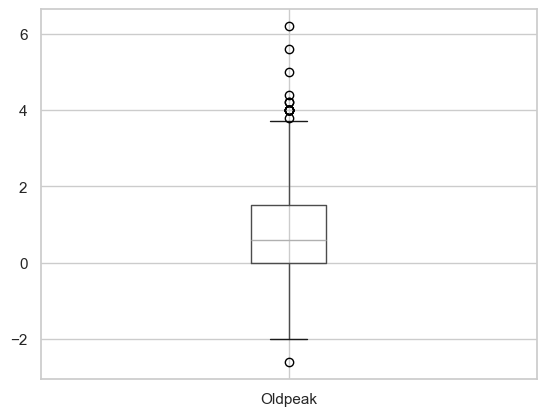

In [58]:
for col in lst_num:
    plt.figure()
    df[[col]].boxplot(grid = True)
    plt.show()

**Age**
* Нормальное распределение, критичных значений нет

**RestingBP**
* Распределение нормальное, имеет слабы разброс.
* Критичные значения, кроме 0, вероятно являются острой формой заболевания, а не выбросами, стоит оставить.
* Значение 0 является аномальным, невозможно жить при давлении = 0. Необходимо удалить.

**Cholesterol**
* Холестерин не может быть равен 0. Значений очень много, вероятно это закодированные пропуски. Нужно заменить на NaN.
* Остальные критичные точки стоит оставить, поскольку есть вероятность что это тяжелая форма болезни.

**MaxHR**
* распределение близко к нормальному, критичные точки вероятно тяжелая форма болезни.

**Oldpeak**
* Распределение смещено вправо, но это нормально для данного показателя
* Отрицательная точка может быть как редким случаем, так и выбросом. На данном этапе оставлю.
* Остальные критические точки возможны при тяжелей ишемии.

## Summary

Таким образом, для создания модели предсказывающей ССЗ необходимо выполнить следующие шаги по предобработке данных:
1. Обработка пропусков и замена кодирования пропусков 0 у Cholesterin
2. Обработать нулевой выброс (Давление)
3. Кодировка категориальных значений
4. Нормализация данных